In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
%matplotlib inline

n_testing_samples = 20
n_epochs = 5000

In [2]:
def load_data():
    data, targets = load_boston(True)
    data = normalize(data)
    targets = targets.reshape((targets.shape[0], 1))
    x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [3]:
if __name__ == '__main__':
    x_train, x_test, y_train, y_test = load_data()
    features = tf.placeholder(tf.float32, shape=[None, 13])
    targets = tf.placeholder(tf.float32, shape=[None, 1])
    weights = tf.Variable(tf.constant(0.1, shape=[13, 1]))
    bias = tf.constant(0.1)
    predicted = tf.matmul(features, weights) + bias
    loss = tf.reduce_mean(tf.square(predicted - targets))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
    init = tf.global_variables_initializer()
    sess = tf.InteractiveSession()
    sess.run(init)
    for epoch in range(n_epochs): # training
        sess.run(optimizer, feed_dict={features: x_train, targets: y_train})
        accuracy = loss.eval(feed_dict={features: x_train, targets: y_train})
        if epoch % 100 == 0:
            print('current loss: {}'.format(accuracy))

    testing_predictions = sess.run(predicted, feed_dict={features: x_test})
    testing_predictions = testing_predictions.flatten()
    y_test = y_test.reshape(152)


current loss: 428.01470947265625
current loss: 69.78788757324219
current loss: 68.29356384277344
current loss: 67.79733276367188
current loss: 67.41776275634766
current loss: 67.07434844970703
current loss: 66.75714111328125
current loss: 66.46269989013672
current loss: 66.18846130371094
current loss: 65.93218994140625
current loss: 65.69194030761719
current loss: 65.46597290039062
current loss: 65.25273895263672
current loss: 65.05088806152344
current loss: 64.85922241210938
current loss: 64.67666625976562
current loss: 64.50230407714844
current loss: 64.33527374267578
current loss: 64.17485809326172
current loss: 64.02037811279297
current loss: 63.87125778198242
current loss: 63.72700500488281
current loss: 63.58713912963867
current loss: 63.45124816894531
current loss: 63.31898880004883
current loss: 63.190025329589844
current loss: 63.06406784057617
current loss: 62.94088363647461
current loss: 62.820213317871094
current loss: 62.701873779296875
current loss: 62.58567810058594
curr

prediction: 25.676889419555664, actual: 24.6
prediction: 30.044570922851562, actual: 20.9
prediction: 25.904752731323242, actual: 21.1
prediction: 31.677492141723633, actual: 28.5
prediction: 19.485401153564453, actual: 16.1
prediction: 11.943418502807617, actual: 15.6
prediction: 24.908405303955078, actual: 18.5
prediction: 19.08884048461914, actual: 9.7
prediction: 25.739789962768555, actual: 36.2
prediction: 22.926729202270508, actual: 19.2
prediction: 24.295194625854492, actual: 24.4
prediction: 22.13338851928711, actual: 17.1
prediction: 22.3177433013916, actual: 18.7
prediction: 19.314207077026367, actual: 10.9
prediction: 28.914396286010742, actual: 22.5
prediction: 22.358156204223633, actual: 19.6
prediction: 26.590559005737305, actual: 24.4
prediction: 24.44182014465332, actual: 18.9
prediction: 23.490493774414062, actual: 21.4
prediction: 22.358156204223633, actual: 19.6


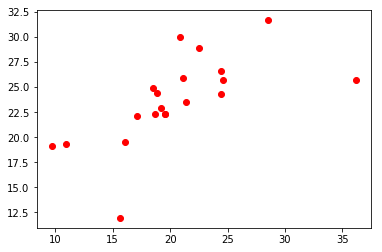

In [4]:
    for sample in range(n_testing_samples): # testing
        rand = np.random.randint(0, 152)
        prediction = testing_predictions[rand]
        actual = y_test[rand]
        print('prediction: {}, actual: {}'.format(prediction, actual))
        plt.plot([actual], [prediction], 'ro')
        